
# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.
5. You can check also the `MLPRegressor` for this task!
6. Check and discuss the results.


In [227]:
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from matplotlib.colors import BASE_COLORS
sns.set_theme(style="ticks", color_codes=True)



# import sys
# import statistics
import math

# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [131]:
data = pd.read_csv('/home/mono/gitHub/Ironweek4/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head(4)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize


In [68]:
data.shape

(9134, 24)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [132]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
data.columns = cols

In [133]:
data.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [134]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [135]:
data['effective_to_date'].dtype

dtype('<M8[ns]')

In [136]:
data["effective_to_date"].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

### Divide categorical and numerical

In [137]:
num = data.select_dtypes(np.number)
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [138]:
num.shape

(9134, 8)

In [139]:
cat = data.select_dtypes(np.object)
cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [140]:
cat.shape

(9134, 15)

In [141]:
cat= cat.drop(columns = ["customer"])

In [142]:
cat.shape

(9134, 14)

#### 3. Plot a correlation matrix, what can you see?


<AxesSubplot:>

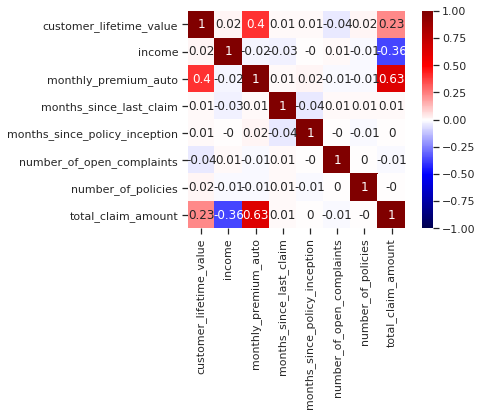

In [15]:
# Check multicollinearity in numerical variables
# There is not higher correlation between the features

sns.heatmap(num.corr().round(2),vmin=-1, vmax=1, center=0, annot = True,square=True,
cmap='seismic')

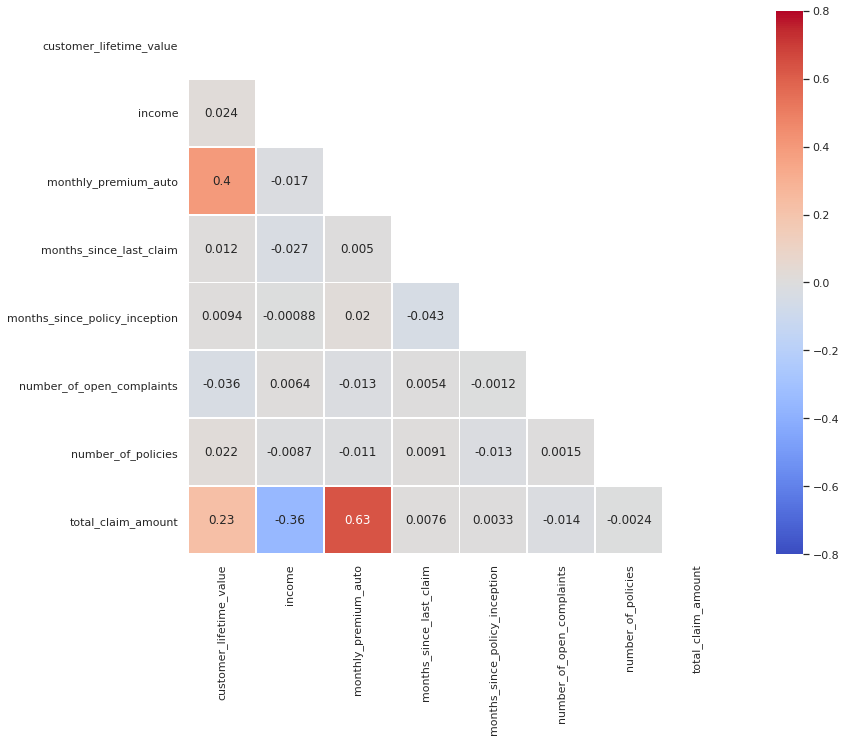

In [21]:
mask = np.zeros_like(num.corr())
# np.zeros_like(num.corr())
# Return an array of zeros with the same shape and type as a given array. https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.zeros_like.html
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(num.corr(), mask=mask, annot = True,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

### 4. Create a function to plot every discrete variables. 
Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
### 5. What can you see in the plots?

# -----------------------------***

In [ ]:
#Function from IH -- do not run
def barplot (num):
    sns.set(rc={"figure.figsize": (16,8)})
    for i, col in  enumerate(num):
        plt.figure(i)
        sns.barplot(x = num[col].value_counts().index, y = num[col].value_counts())
    plt.show()

In [36]:
sns.set(rc={"figure.figsize": (10,5)})
for i, col in  enumerate(num):
    plt.figure(i)
    sns.barplot(x = num[col].value_counts().index, y = num[col].value_counts())
    plt.show()

KeyboardInterrupt: 

In [37]:
# function to plot all columns with bars -- Computer breaker
def df_bar(df):
    """
    Docs
    """
    sns.set(rc={'figure.figsize':(10,5)})

    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())

    plt.show()

In [38]:
df_bar(num)

KeyboardInterrupt: 

# -------------------------------***

In [19]:
def df_hist(df):
    """
    docs
    """
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

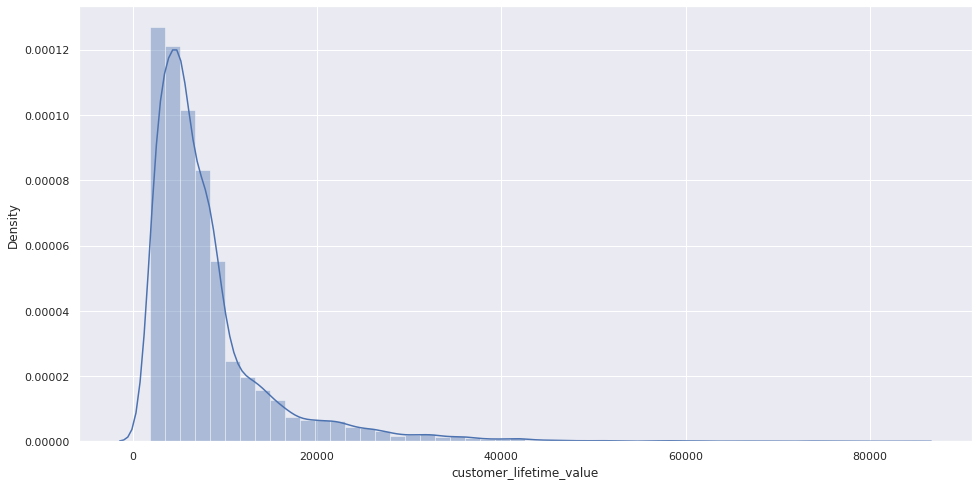

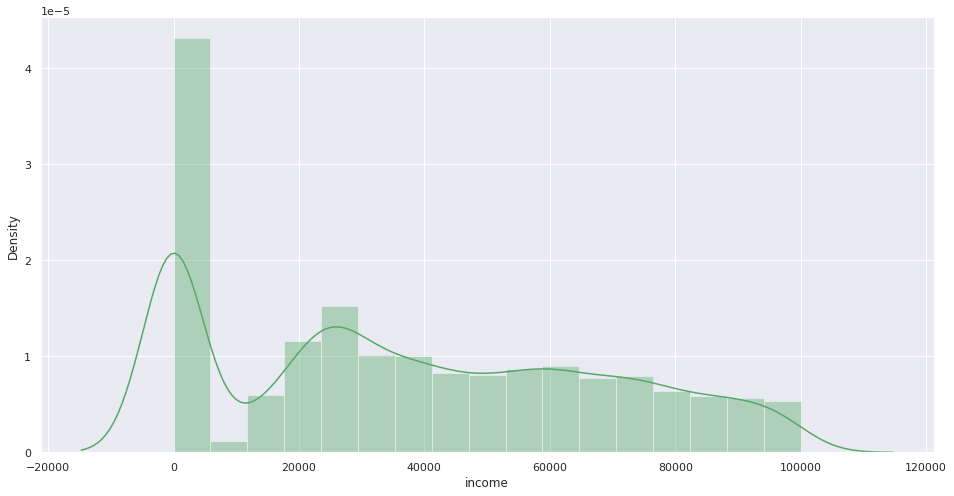

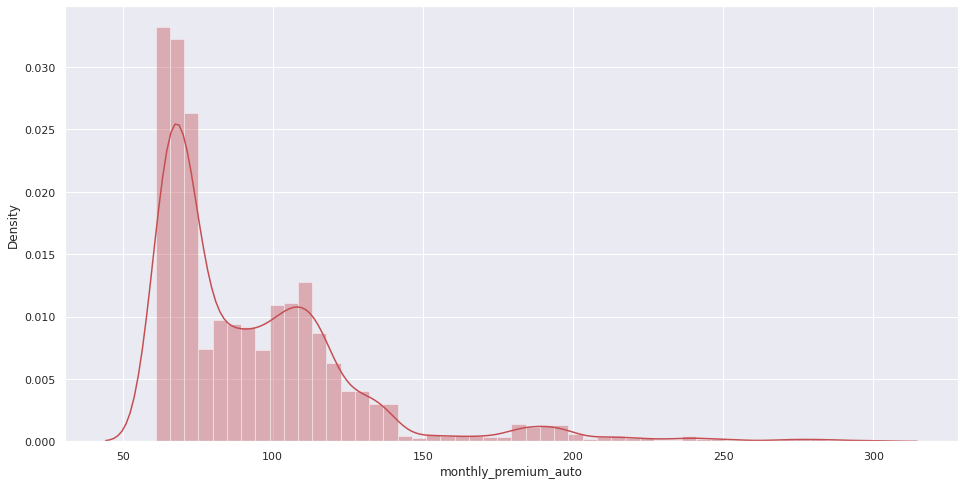

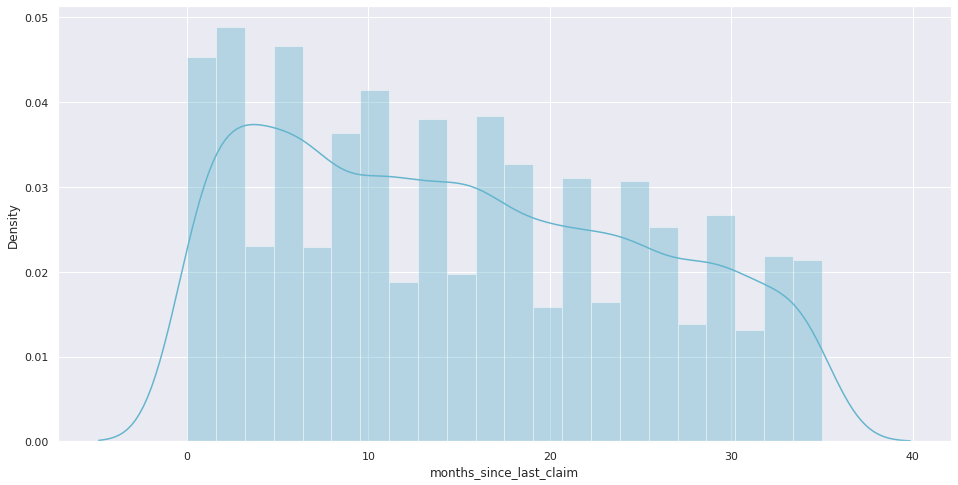

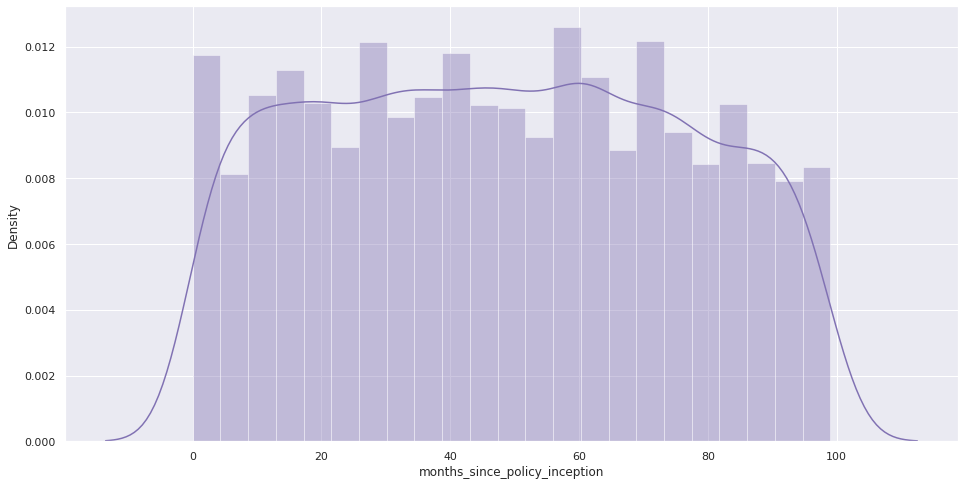

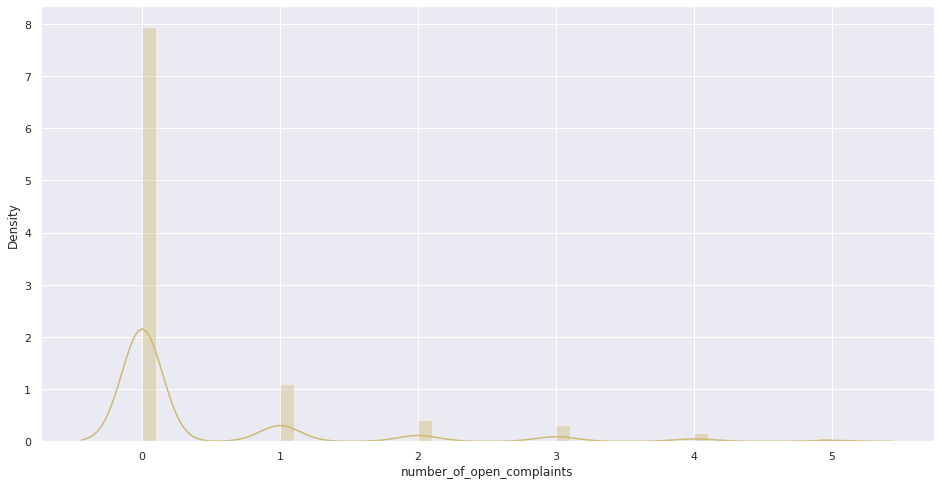

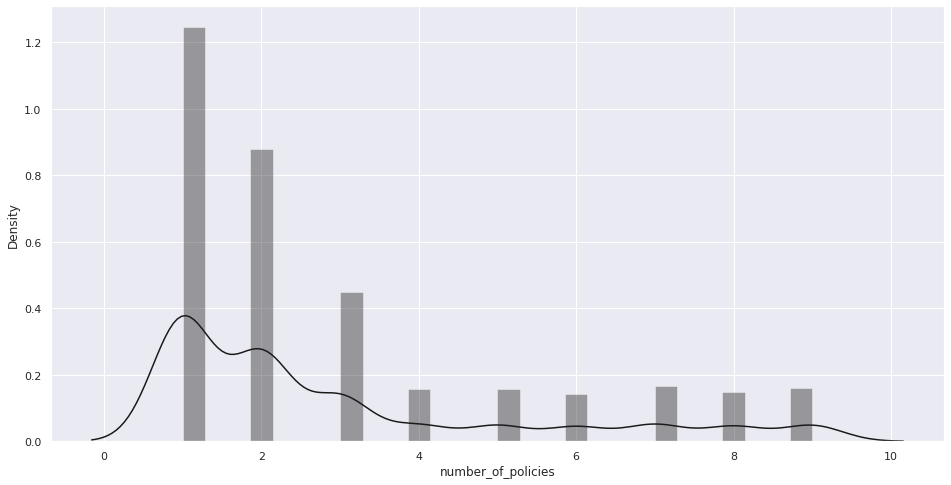

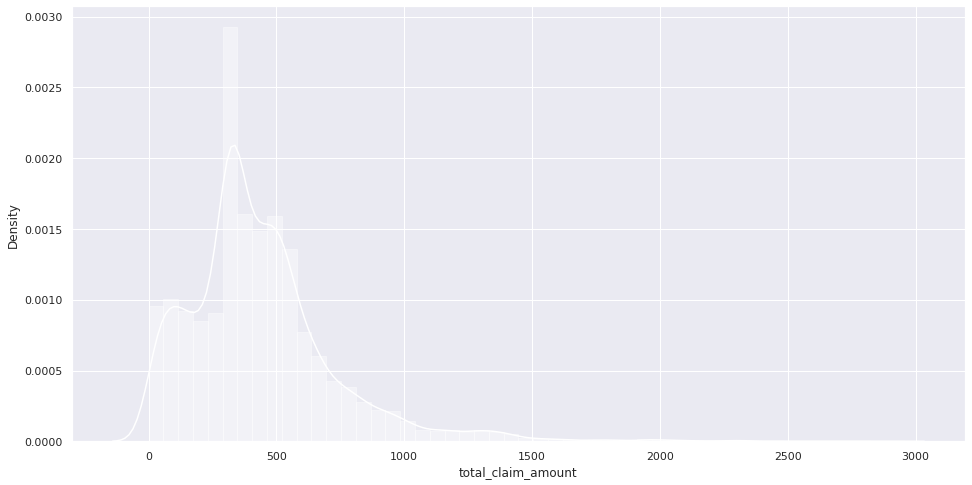

In [20]:
df_hist(num)

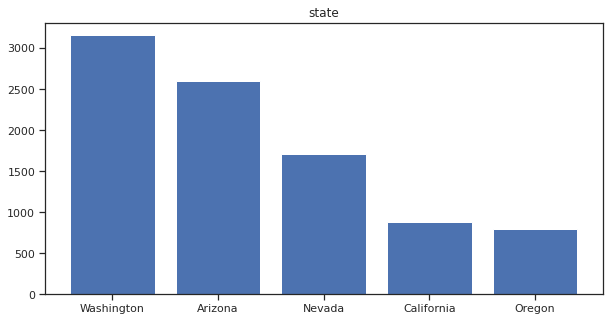

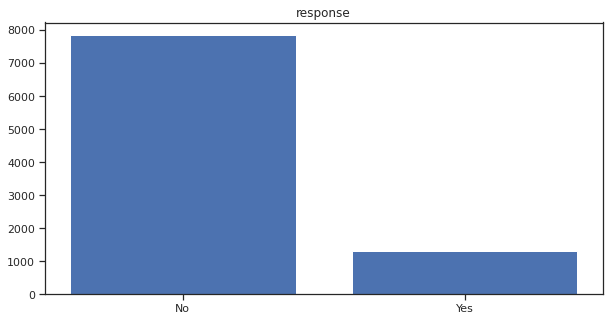

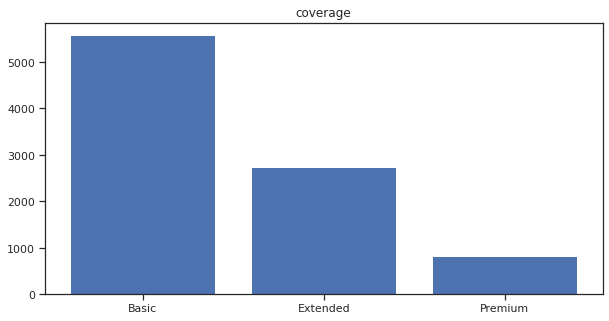

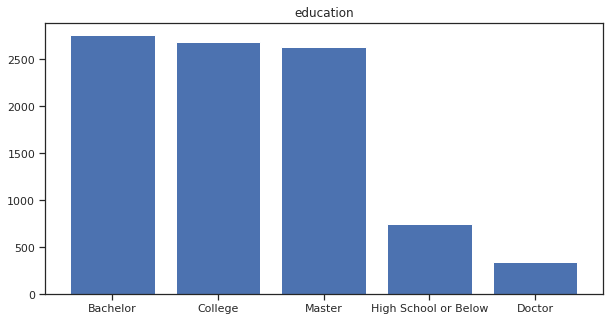

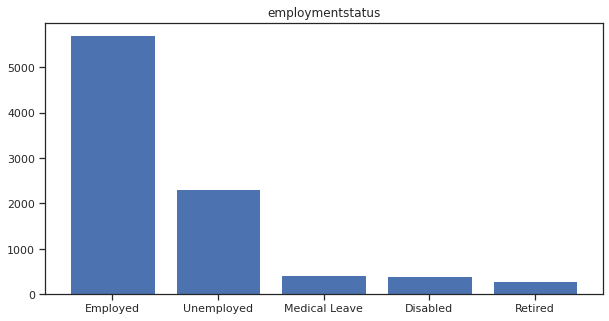

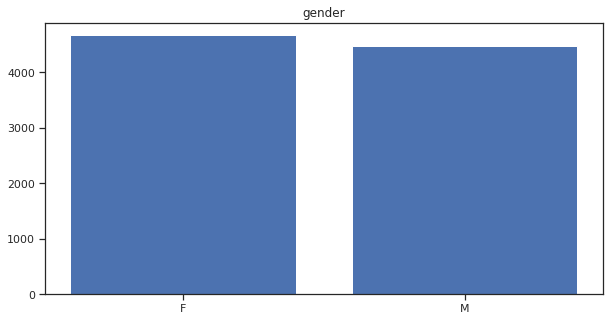

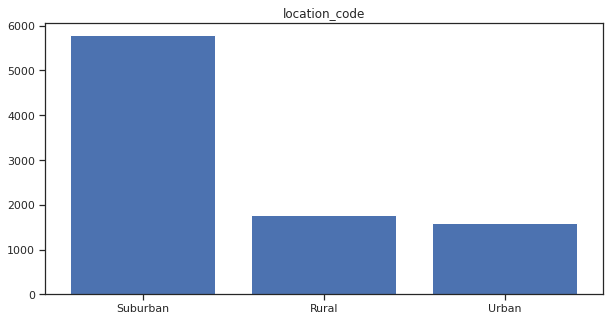

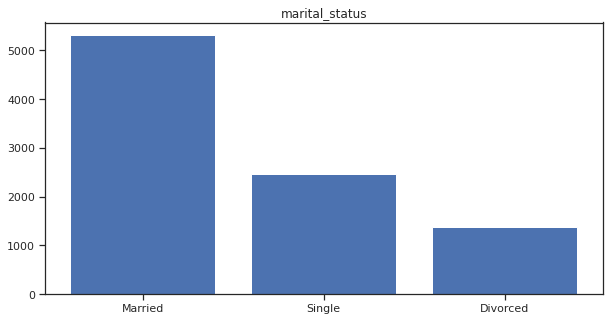

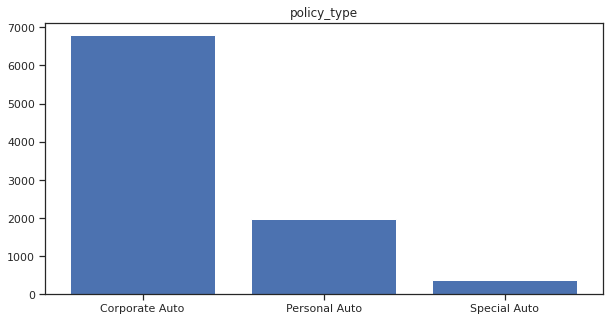

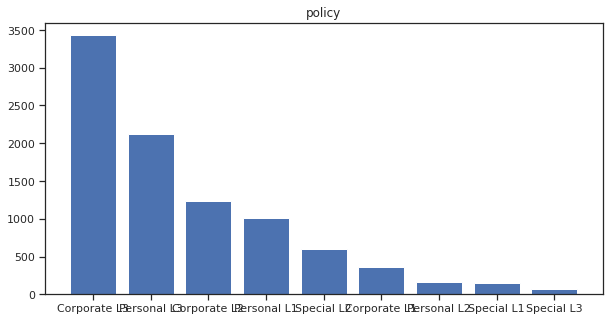

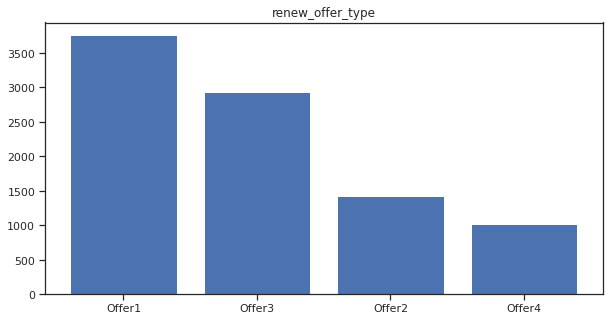

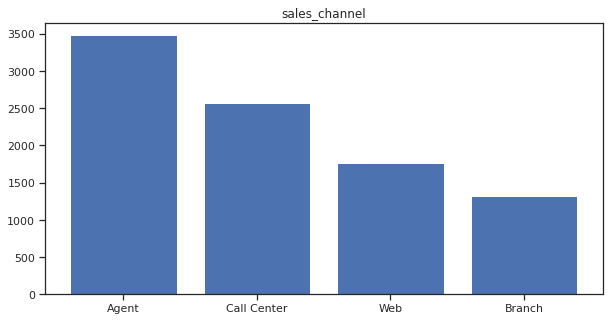

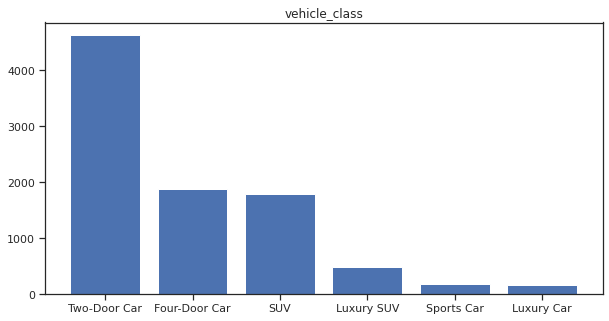

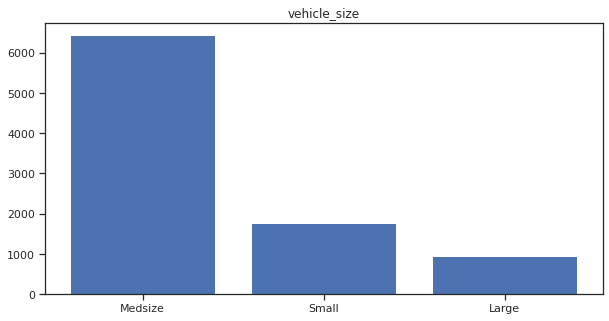

In [18]:
#import matplotlib.pyplot as plt                 # visualization library
#%matplotlib inline

for c in cat:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show()
    
    
    
 # other simple option   
#for i in range(cat.shape[1]):
 #   sns.histplot(cat[cat.columns[i]], bins=50)
  #  plt.show()

### 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

In [143]:
num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [ ]:
box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))

for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)

plt.show()

<AxesSubplot:ylabel='total_claim_amount'>

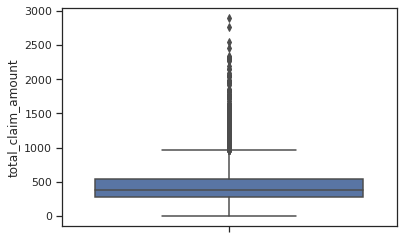

In [26]:
sns.boxplot(y="total_claim_amount", data=num)
#plt.show()

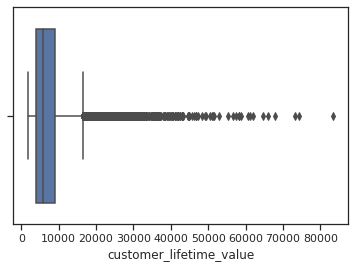

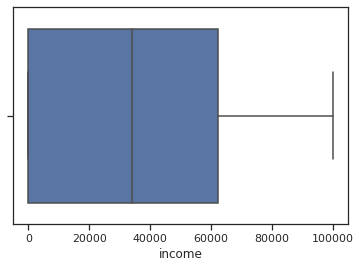

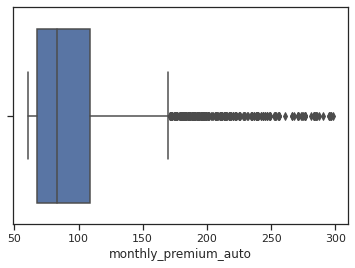

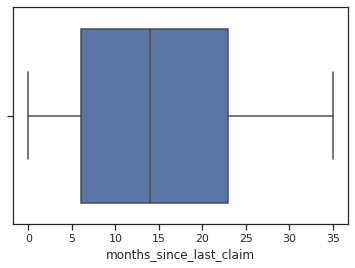

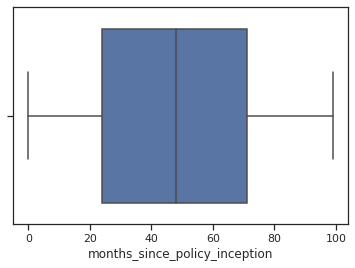

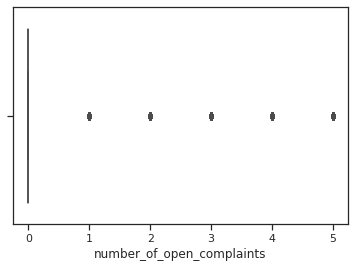

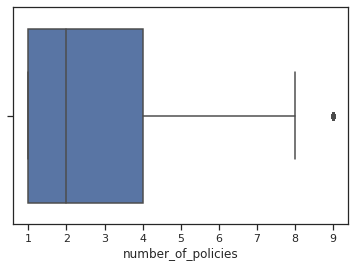

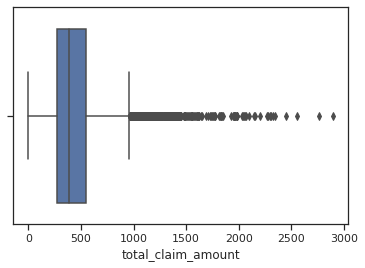

In [33]:
# sns.boxplot(y=numericals['income'], data=numericals)

for i in range(num.shape[1]):
    sns.boxplot(num[num.columns[i]])
    plt.show()

### 7. Have you found outliers? If you have, what should we do with them?

* customer_lifetime_value
* total_claim_amount
    * Log_Transformation 
    * boxcox trasformation

### 8. Check nan values per column.
* There are not nan vaules.

In [23]:
#data.isna().sum()     # missing values
# data.isna().sum()/data.shape[0]*100
pd.DataFrame(round(num.isna().sum()/len(num),4)*100)

,0
customer_lifetime_value,0.0
income,0.0
monthly_premium_auto,0.0
months_since_last_claim,0.0
months_since_policy_inception,0.0
number_of_open_complaints,0.0
number_of_policies,0.0
total_claim_amount,0.0


In [30]:

pd.DataFrame(round(cat.isna().sum()/len(cat),4)*100)

,0
state,0.0
response,0.0
coverage,0.0
education,0.0
employmentstatus,0.0
gender,0.0
location_code,0.0
marital_status,0.0
policy_type,0.0
policy,0.0


### 9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [80]:
def cont_disc(arg):
    uniquevalues = len(arg.unique())
    if uniquevalues > 100:
        x = ['continuous',arg.name]
        return x
    else:
        x = ['discrete',arg.name]
        return x

In [81]:
# How to improve this function!!

lst = []
for i in range(num.shape[1]):
    print(cont_disc(num[num.columns[i]]))

['continuous', 'customer_lifetime_value']
['continuous', 'income']
['continuous', 'monthly_premium_auto']
['discrete', 'months_since_last_claim']
['discrete', 'months_since_policy_inception']
['discrete', 'number_of_open_complaints']
['discrete', 'number_of_policies']
['continuous', 'total_claim_amount']


In [144]:
num_new = num[["customer_lifetime_value", "income", "monthly_premium_auto", "total_claim_amount"]]


In [145]:
num_new.head(2)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935


In [146]:
num_df = num_new

In [147]:
num_df.head(2)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935


In [148]:
cat_to_add = num [["months_since_last_claim", "months_since_policy_inception", "number_of_open_complaints", "number_of_policies"]] 

In [149]:
cat_to_add.head(2)

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8


In [150]:
cat_df = pd.concat([cat, cat_to_add], axis = 1)

In [151]:
cat_df.head(2)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8


In [152]:
cat_df.shape

(9134, 18)

### 10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
* nope, the features are cleaned.

In [90]:
# check for unique values -- code from Himanshu

print('Categorical Features:', len(cat_df))
print('----------')
for c in cat_df:
    print('Name: {}'.format(data[c].name))    # column name
    print('Type: {}'.format(data[c].dtype))   # column type
    print('Unique values: {}'.format(len(data[c].unique())))   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 9134
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Emplo

### 11. Get categorical features.
* Here we have a new set of categoricals and numericals


In [153]:
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1


In [154]:
num_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


### 12.  What should we do with the customer id column?
* allready dropped!

#### LAB 4.2  Finished -----------------------------------------




# Lab | Feature extraction

### 1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

### 2. Plot all the categorical variables with the proper plot. What can you see?


In [34]:
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1


In [ ]:
# sns.boxplot(y=numericals['income'], data=numericals)

for i in range(num.shape[1]):
    sns.boxplot(num[num.columns[i]])
    plt.show()

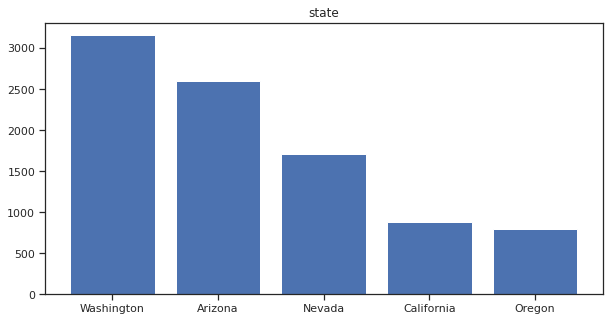

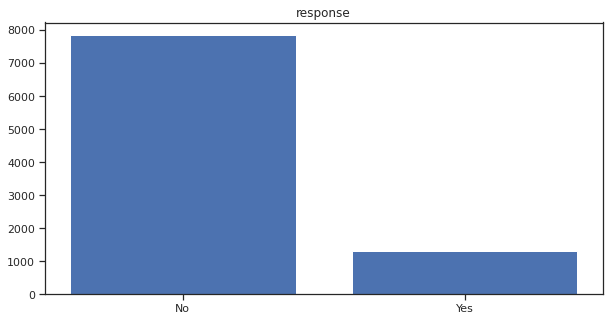

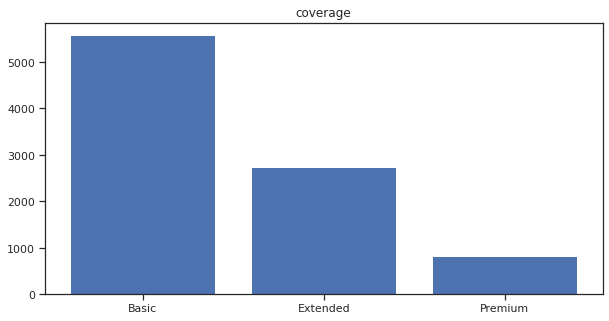

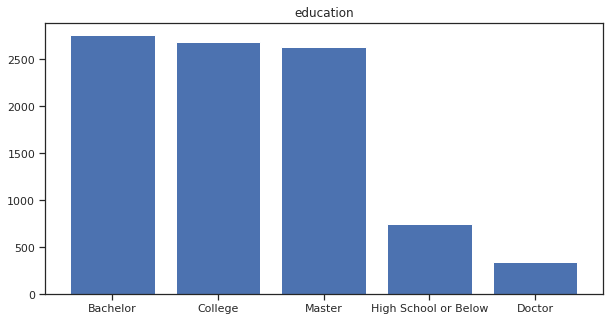

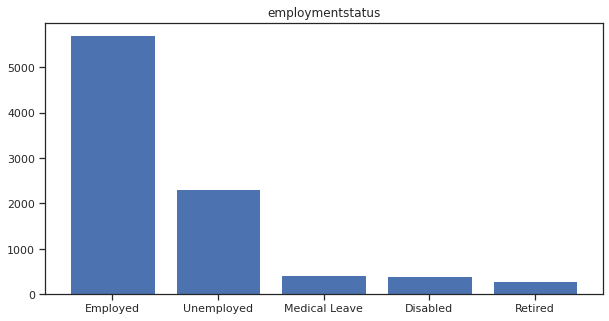

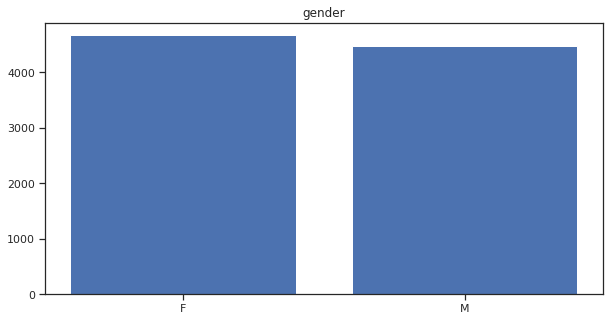

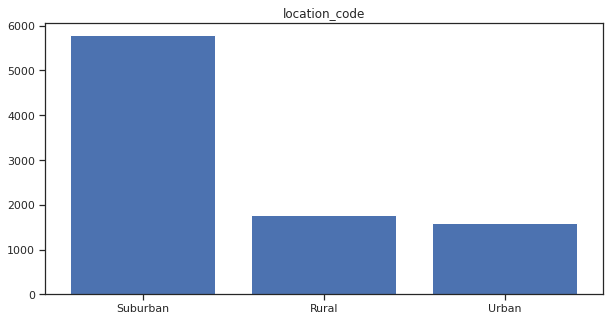

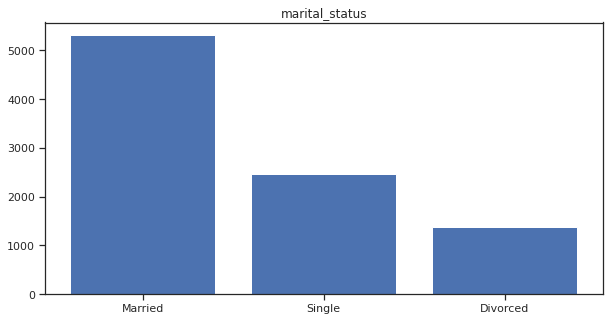

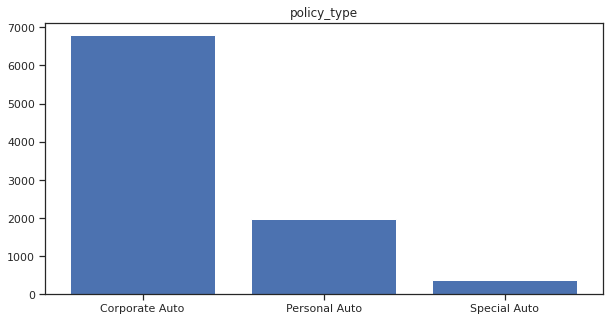

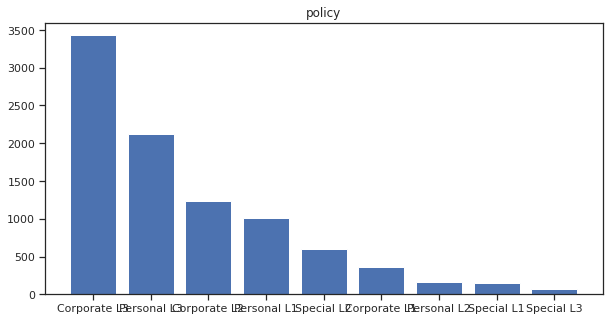

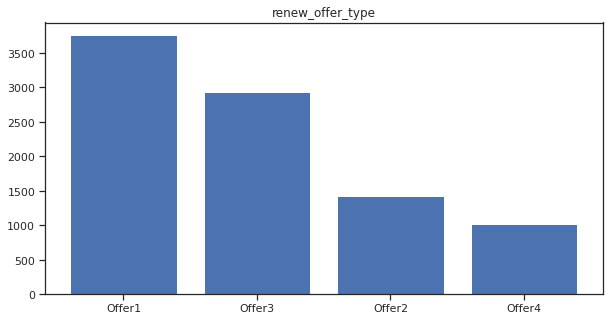

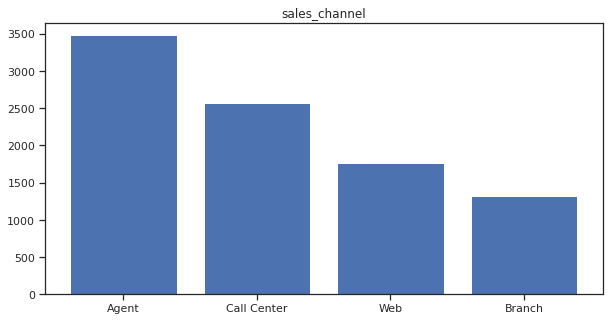

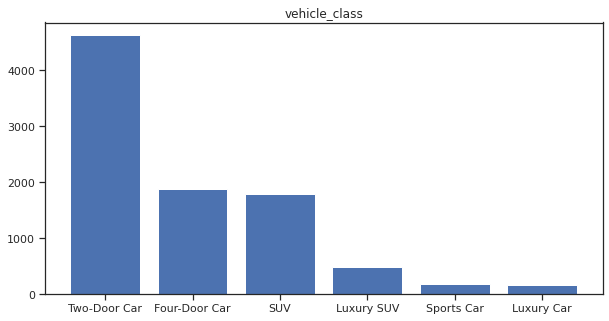

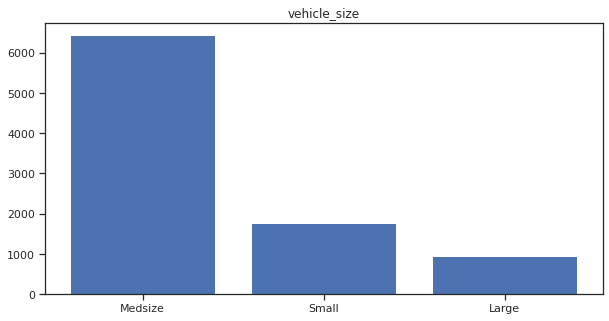

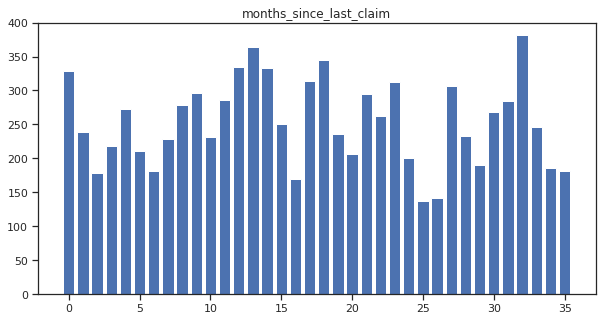

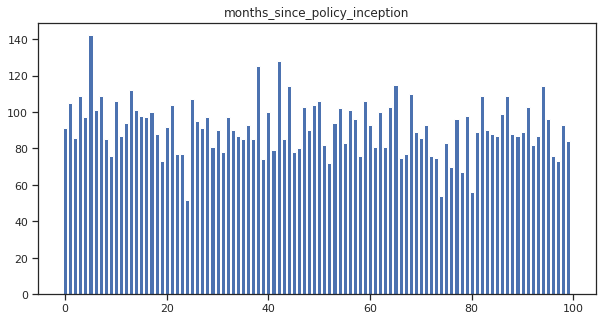

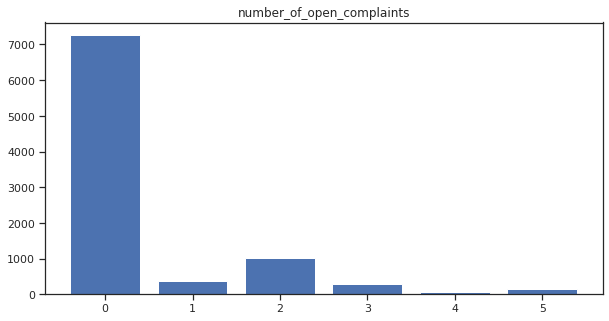

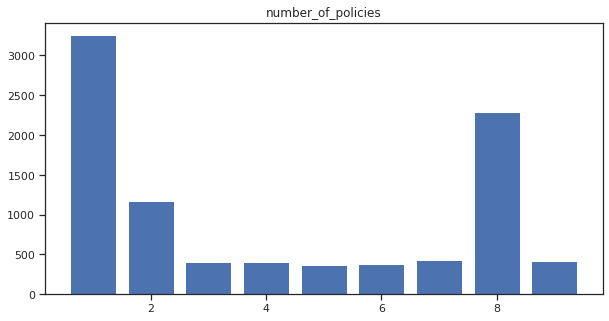

In [28]:
for c in cat_df:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show()

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

#####  we can drop:
* **gender** 

##### we can group values in: 
* **policy, vehicle_class, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies**


In [29]:
# check for unique values -- code from Himanshu

print('Categorical Features:', len(cat_df))
print('----------')
for c in cat_df:
    print('Name: {}'.format(data[c].name))    # column name
    print('Type: {}'.format(data[c].dtype))   # column type
    print('Unique values: {}'.format(len(data[c].unique())))   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 9134
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Emplo

### 4. Plot time variable. Can you extract something from it?
* **months_since_last_claim** can be grouped in 4 - categories5
* **months_since_policy_inception** is to homogeneous, we cam dropped it 

In [155]:
 cat_time = cat_df[["months_since_last_claim", "months_since_policy_inception"]]

In [156]:
cat_time.head()


,months_since_last_claim,months_since_policy_inception
0,32,5
1,13,42
2,18,38
3,18,65
4,12,44


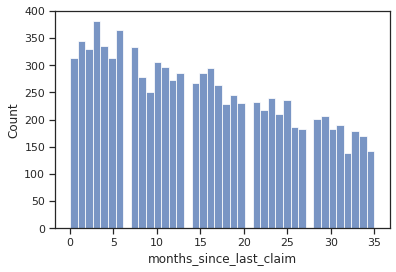

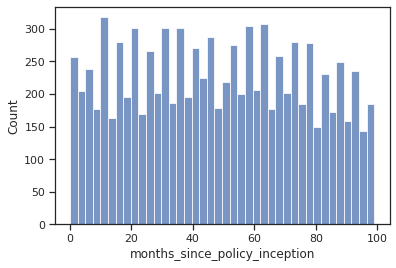

In [34]:
for i in range(cat_time.shape[1]):
    sns.histplot(cat_time[cat_time.columns[i]], bins=40)
    plt.show()

### LAB 43 Finished -------------------------------







# Lab | Data cleaning and wrangling



### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.


In [157]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   int64  
 2   monthly_premium_auto     9134 non-null   int64  
 3   total_claim_amount       9134 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 285.6 KB


In [158]:
num_df["customer_lifetime_value"].info()

AttributeError: 'Series' object has no attribute 'info'

In [159]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [160]:
clv_log = num["customer_lifetime_value"].apply(log_transfom_clean_) # , axis = 1)

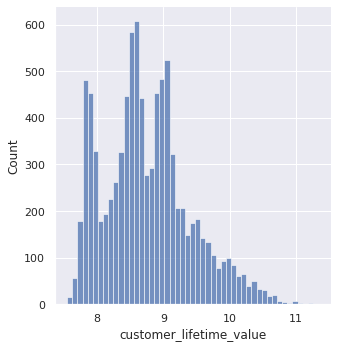

In [161]:
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(clv_log)
plt.show()

In [162]:
customer_lv_log = pd.DataFrame(clv_log)

In [163]:
customer_lv_log.columns = ["customer_lv_log"]

In [164]:
customer_lv_log.head()

,customer_lv_log
0,7.924260
1,8.850738
2,9.464008
3,8.941920
4,7.942253


<AxesSubplot:xlabel='customer_lifetime_value'>

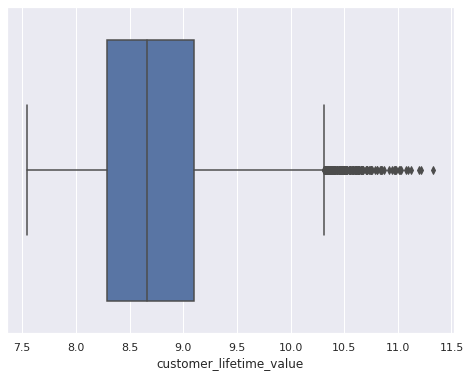

In [62]:
sns.boxplot(clv_log)

<AxesSubplot:>

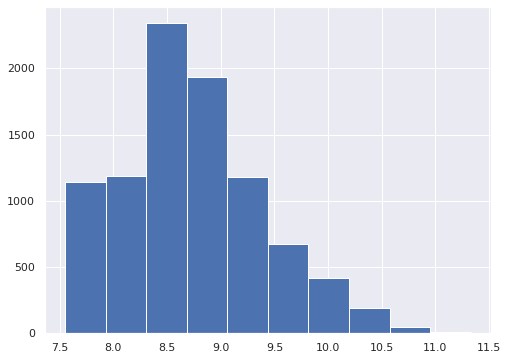

In [52]:
clv_log.hist()

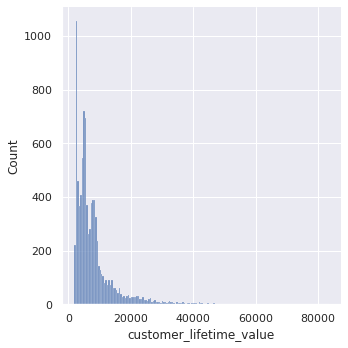

In [51]:
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(num["customer_lifetime_value"])
plt.show()

In [165]:
num_df.shape

(9134, 4)

In [166]:
num_df = num_df.drop(columns = ["customer_lifetime_value"])

In [167]:
num_df_trans = pd.concat([num_df, customer_lv_log], axis = 1)

In [144]:
num_df_trans.value_counts()

income  monthly_premium_auto  total_claim_amount  customer_lv_log
17101   113                   542.400000          9.417248           6
0       118                   566.400000          9.072792           6
68931   66                    309.577946          8.581568           6
31278   92                    441.600000          8.168499           6
25370   102                   489.600000          9.362108           6
12430   73                    350.400000          8.550531           6
96306   95                    185.355353          8.925206           6
64125   108                   369.818708          9.064910           6
40870   105                   504.000000          9.451870           6
26057   74                    523.888845          9.048980           6
40864   109                   166.937747          8.362397           6
0       119                   571.200000          9.110408           6
60021   99                    882.871945          8.278684           6
79751   63 

### 2. Create a copy of the dataframe for the data wrangling.


In [168]:
num_copy = num_df_trans.copy()
cat_copy = cat_df.copy()

In [169]:
cat_copy.shape

(9134, 18)

### 3. Normalize the continuous variables. You can use any one method you want.

In [170]:
X_num = num_df_trans

In [171]:
X_num.head()

,income,monthly_premium_auto,total_claim_amount,customer_lv_log
0,56274,69,384.811147,7.924260
1,0,94,1131.464935,8.850738
2,48767,108,566.472247,9.464008
3,0,106,529.881344,8.941920
4,43836,73,138.130879,7.942253


In [172]:
# normalising 

for cont_var in X_num:
    maximum = X_num[cont_var].max()
    minimum = X_num[cont_var].min()
    X_num[cont_var] = X_num[cont_var].apply(lambda x: (x - minimum) / (maximum - minimum))

In [173]:
X_num.head()

,income,monthly_premium_auto,total_claim_amount,customer_lv_log
0,0.562847,0.033755,0.132974,0.099340
1,0.000000,0.139241,0.391051,0.344314
2,0.487763,0.198312,0.195764,0.506471
3,0.000000,0.189873,0.183117,0.368424
4,0.438443,0.050633,0.047710,0.104098


### 4. Encode the categorical variables


In [174]:
# Response to bool 
cat_df["response"] = cat_df["response"].apply(lambda x: 1 if x == "Yes" else 0)

In [175]:
cat_df["education"] = cat_df["education"].apply(lambda x: "Graduate" if x in ["Master", "Doctor"] else x)

In [176]:
inactive = ["Medical Leave", "Disabled", "Retired"]
cat_df["employmentstatus"] = cat_df["employmentstatus"].apply(lambda x: "Inactive" if x in inactive else x)

In [177]:
cat_df["gender"] = cat_df["gender"].apply(lambda x: 1 if x == "F" else 0)

In [178]:
cat_df["policy"] = cat_df["policy"].apply(lambda x: x[-2:])

In [179]:
luxury = ["Sports Car", "Luxury SUV", "Luxury Car"]
cat_df["vehicle_class"] = cat_df["vehicle_class"].apply(lambda x: "Luxury" if x in luxury else x)

In [52]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   state                          9134 non-null   object
 1   response                       9134 non-null   int64 
 2   coverage                       9134 non-null   int64 
 3   education                      9134 non-null   object
 4   employmentstatus               9134 non-null   int64 
 5   gender                         9134 non-null   int64 
 6   location_code                  9134 non-null   int64 
 7   marital_status                 9134 non-null   object
 8   policy_type                    9134 non-null   object
 9   policy                         9134 non-null   object
 10  renew_offer_type               9134 non-null   object
 11  sales_channel                  9134 non-null   object
 12  vehicle_class                  9134 non-null   object
 13  veh

### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [180]:
time = pd.DataFrame(data["effective_to_date"])
time.head()

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03


In [181]:
#convert time into numbers 
time["day"] = time["effective_to_date"].dt.day
time["week"] = time["effective_to_date"].dt.week
time["month"] = time["effective_to_date"].dt.month


In [182]:
time = time.drop(columns = "effective_to_date")

In [208]:
time.head()

,day,week,month
0,24,8,2
1,31,5,1
2,19,7,2
3,20,3,1
4,3,5,2


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.



In [184]:
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# Ordinal vehicle size

ordinal = cat_df
ordinal.head()


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,0,Basic,Bachelor,Employed,1,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,32,5,0,1
1,Arizona,0,Extended,Bachelor,Unemployed,1,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,13,42,0,8
2,Nevada,0,Premium,Bachelor,Employed,1,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,18,38,0,2
3,California,0,Basic,Bachelor,Unemployed,0,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,18,65,0,7
4,Washington,0,Basic,Bachelor,Employed,0,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,12,44,0,1


In [185]:
ordinal["coverage"] = ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["employmentstatus"] = ordinal["employmentstatus"].map({"Unemployed" : 0, "Inactive" : 1, "Employed" : 2})
ordinal["location_code"] = ordinal["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["vehicle_size"] = ordinal["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [ ]:
# One hot to state

# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class

In [51]:
ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   state                          9134 non-null   object
 1   response                       9134 non-null   int64 
 2   coverage                       9134 non-null   int64 
 3   education                      9134 non-null   object
 4   employmentstatus               9134 non-null   int64 
 5   gender                         9134 non-null   int64 
 6   location_code                  9134 non-null   int64 
 7   marital_status                 9134 non-null   object
 8   policy_type                    9134 non-null   object
 9   policy                         9134 non-null   object
 10  renew_offer_type               9134 non-null   object
 11  sales_channel                  9134 non-null   object
 12  vehicle_class                  9134 non-null   object
 13  veh

In [193]:
one_hot = ordinal.copy()

In [189]:
one_hot_colums = ordinal.select_dtypes(include = object).columns[1:]


In [194]:
one_hot = pd.get_dummies(one_hot, columns = one_hot_colums)


In [195]:
one_hot.head()

,state,response,coverage,employmentstatus,gender,location_code,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,education_Bachelor,education_College,education_Graduate,education_High School or Below,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,Washington,0,0,2,1,1,1,32,5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
1,Arizona,0,1,0,1,1,1,13,42,0,8,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
2,Nevada,0,2,2,1,1,1,18,38,0,2,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
3,California,0,0,0,0,1,1,18,65,0,7,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
4,Washington,0,0,2,0,0,1,12,44,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [196]:
one_hot_state = one_hot[["state"]]

In [200]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(one_hot_state)
one_hot_state_encoded = encoder.transform(one_hot_state).toarray()
one_hot_state_encoded = pd.DataFrame (one_hot_state_encoded)


In [201]:
one_hot_state_encoded.head()

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [203]:
cat_final = one_hot.drop(columns = ["state"])


In [206]:
cat_encoded = pd.concat([cat_final, one_hot_state_encoded], axis = 1)

#num_df_trans = pd.concat([num_df, customer_lv_log], axis = 1)

In [207]:
cat_encoded.head()

,response,coverage,employmentstatus,gender,location_code,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,education_Bachelor,education_College,education_Graduate,education_High School or Below,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,0,1,2,3
0,0,0,2,1,1,1,32,5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0
1,0,1,0,1,1,1,13,42,0,8,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0
2,0,2,2,1,1,1,18,38,0,2,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0
3,0,0,0,0,1,1,18,65,0,7,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0
4,0,0,2,0,0,1,12,44,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0


### LAB 44 Finished -------------------------------


# 45 Lab | Comparing regression models




### 1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

In [209]:
final_df = pd.concat([X_num, cat_encoded, time], axis = 1)


In [213]:
final_df.head()

,income,monthly_premium_auto,total_claim_amount,customer_lv_log,response,coverage,employmentstatus,gender,location_code,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,education_Bachelor,education_College,education_Graduate,education_High School or Below,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,0,1,2,3,day,week,month
0,0.562847,0.033755,0.132974,0.099340,0,0,2,1,1,1,32,5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,24,8,2
1,0.000000,0.139241,0.391051,0.344314,0,1,0,1,1,1,13,42,0,8,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,31,5,1
2,0.487763,0.198312,0.195764,0.506471,0,2,2,1,1,1,18,38,0,2,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,19,7,2
3,0.000000,0.189873,0.183117,0.368424,0,0,0,0,1,1,18,65,0,7,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,20,3,1
4,0.438443,0.050633,0.047710,0.104098,0,0,2,0,0,1,12,44,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,3,5,2


In [215]:
# X_drop_y = X_num_normalized.drop([7], axis = 1)

X = final_df.drop(columns = "total_claim_amount", axis = 1)
y = final_df["total_claim_amount"]

In [216]:
X.head()

,income,monthly_premium_auto,customer_lv_log,response,coverage,employmentstatus,gender,location_code,vehicle_size,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,education_Bachelor,education_College,education_Graduate,education_High School or Below,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,0,1,2,3,day,week,month
0,0.562847,0.033755,0.099340,0,0,2,1,1,1,32,5,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0,24,8,2
1,0.000000,0.139241,0.344314,0,1,0,1,1,1,13,42,0,8,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,31,5,1
2,0.487763,0.198312,0.506471,0,2,2,1,1,1,18,38,0,2,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,19,7,2
3,0.000000,0.189873,0.368424,0,0,0,0,1,1,18,65,0,7,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,20,3,1
4,0.438443,0.050633,0.104098,0,0,2,0,0,1,12,44,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,3,5,2


In [217]:
y.head()

0    0.132974
1    0.391051
2    0.195764
3    0.183117
4    0.047710
Name: total_claim_amount, dtype: float64

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Modelling 
### 2. Try a simple linear regression with all the data to see whether we are getting good results.

#### Simple LinearRegression Model

In [231]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.6311096965223943

### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


#### code from Himanshu

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns = "total_claim_amount"),
                                                    final_df.total_claim_amount, test_size = 0.2)

In [230]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.628686309018593, Test -> 0.6311096965223943
Lasso: Train -> 0.0, Test -> -9.681224837621016e-05
Ridge: Train -> 0.6285693303133435, Test -> 0.632025408619973
ElasticNet: Train -> 0.0, Test -> -9.681224837621016e-05


### 4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.


In [233]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.32644897191526245, Test -> 0.004670985335008759


### 5. You can check also the `MLPRegressor` for this task!

In [234]:
from sklearn.neural_network import MLPRegressor
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation(mlpr, X_train, y_train)

MLPRegressor: Train -> 0.13818191486023568, Test -> -0.008847238706010119


### Another Models

In [235]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.8670658313758325, Test -> 0.827953828137261
RandomForestRegressor: Train -> 0.9781514283357684, Test -> 0.8402714049380577


In [236]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> 0.461583079633356, Test -> 0.4649516938772529


In [237]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 1.0, Test -> 0.6519052392417919


### LAB 45 Finished -------------------------------